# End to End Data Project

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [170]:
# Importing the data
file_name = "housing.csv"
data_path = os.path.join("datasets",file_name)

df = pd.read_csv(data_path)

In [171]:
# The head function shows the first 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [173]:
# To get the count of each category in a dataset, we use the value counts
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [174]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting the whole numerical attributes in a dataset, is done using the hist func

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

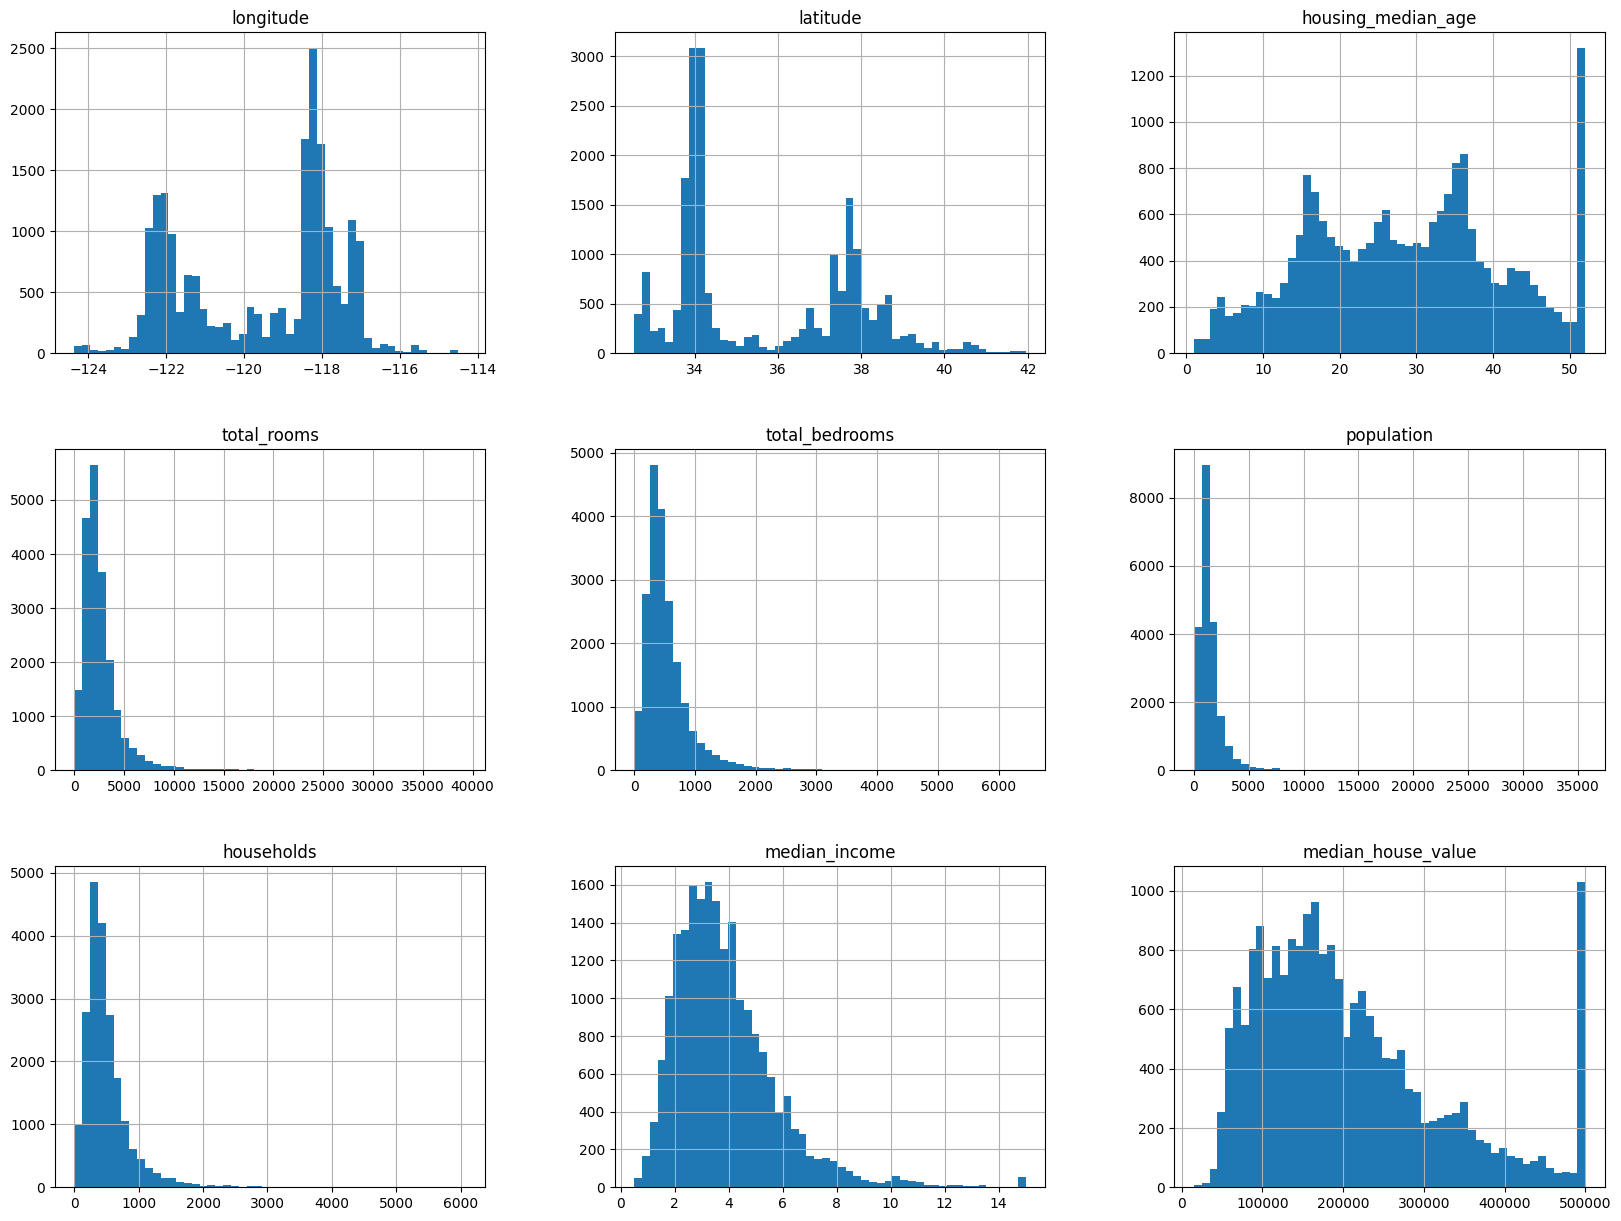

In [175]:
df.hist(bins=50,figsize=(20,15))

## Creating a train/test set

In [176]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

Now, we're doing a stratified sampling to avoid bias during training and testing, as out sets,might be biased by only getting a specific range of incomes per example

<Axes: >

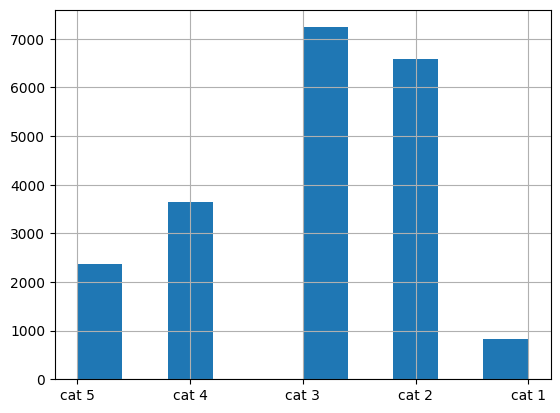

In [177]:
# For that, we're creating a new categorical attribute by grouping the median income into 5 groups

df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=['cat 1','cat 2','cat 3','cat 4','cat 5'])

df['income_cat'].hist()

In [178]:
# Now, we get to do the stratified sampling based on the categorical income median

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index , test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [179]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
cat 3    0.350533
cat 2    0.318798
cat 4    0.176357
cat 5    0.114341
cat 1    0.039971
Name: count, dtype: float64

In [180]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

income_cat
cat 3    0.350594
cat 2    0.318859
cat 4    0.176296
cat 5    0.114462
cat 1    0.039789
Name: count, dtype: float64

In [181]:
# Now, we drop the income cat, to return the dataset into its original state

for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

# Drawing insights from Visualisations

To avoid ruining the actual training set, we will just copy the set and explore It

In [182]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

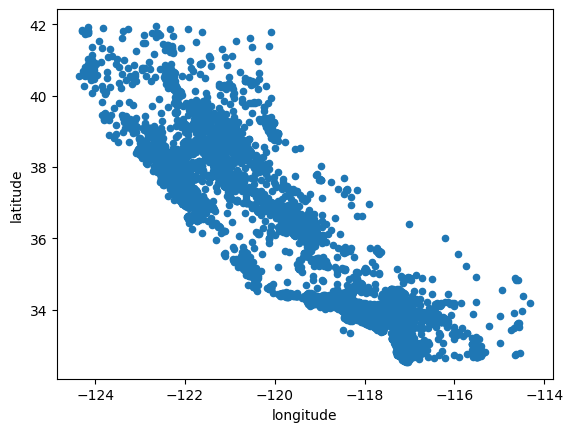

In [183]:
# Here, we can see that there are some geo data, using the longitude and latitude, we can see what it will give us

housing.plot(kind='scatter',x='longitude',y='latitude')

Until now. This does not give us any information about the density, for that we can use an alpha of 0.1 to show the density

<Axes: xlabel='longitude', ylabel='latitude'>

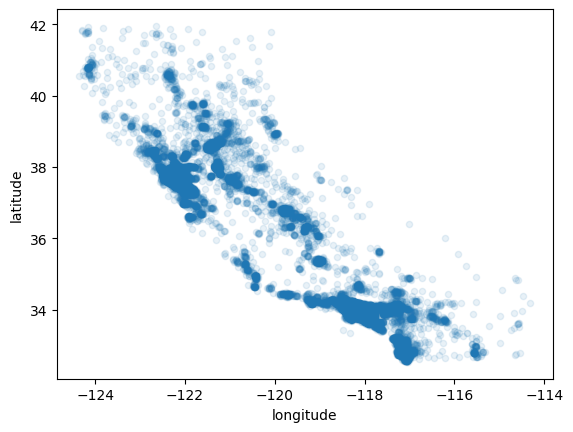

In [184]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

We can add more details into the plot, by adding an s option ( Radius of circle ) and c option ( color of the circle )

<Axes: xlabel='longitude', ylabel='latitude'>

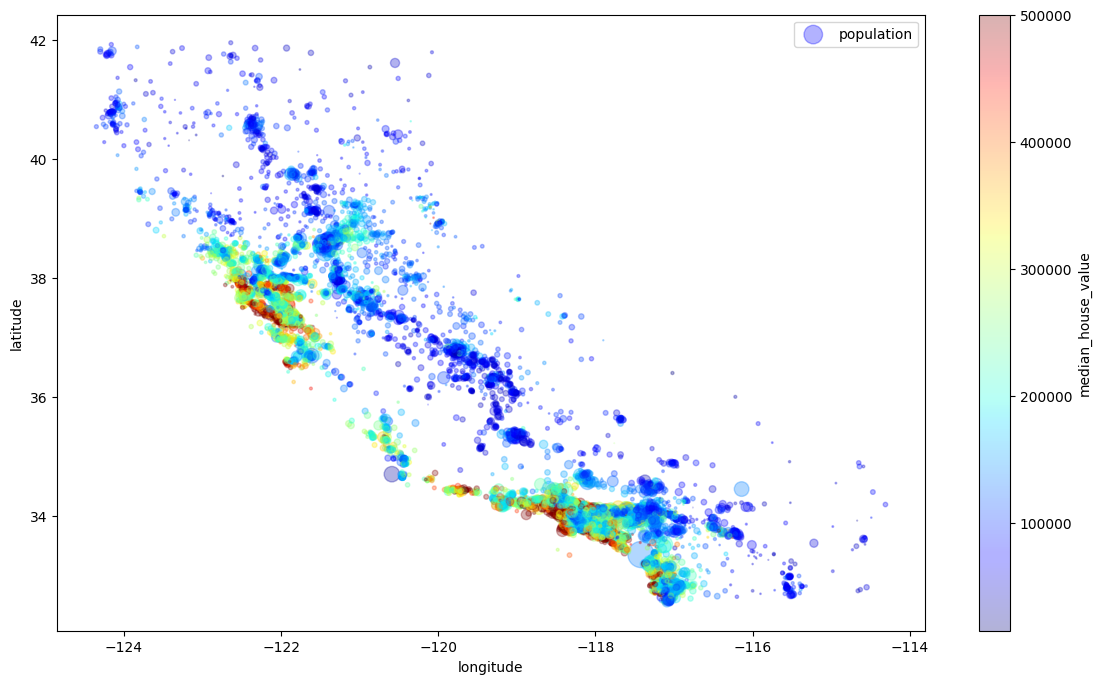

In [185]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,
             s=housing['population']/100,label='population',c='median_house_value',
             figsize=(14,8),
             cmap=plt.get_cmap('jet'),colorbar=True)

We can also calculate the standard correlation coefficient, also known as Pearson's r by using the corr function

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

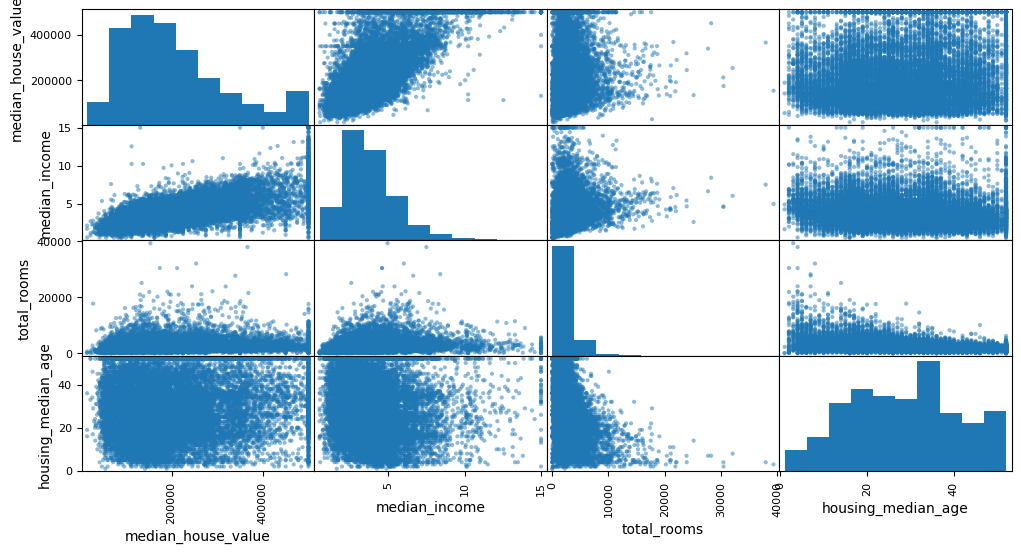

In [186]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,6))

<Axes: xlabel='median_income', ylabel='median_house_value'>

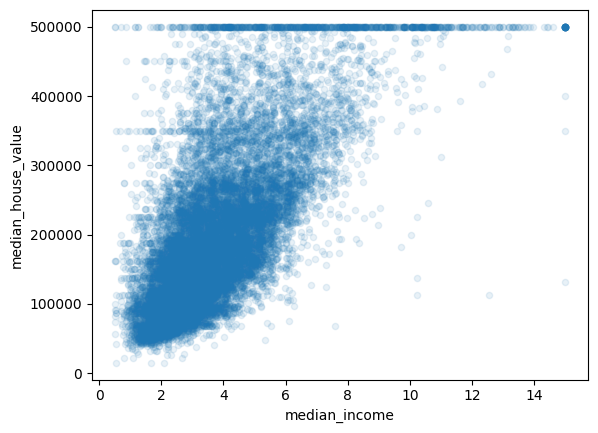

In [187]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

Sometimes, we might just want to add some new combinations of attributes as they are not that useful alone

In [188]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [189]:
# Now, we're going to work with a new and fresh copy of the stratified train set to prepare It for our algorithms

housing = strat_train_set.drop('median_house_value',axis=1) # Only getting the features
housing_labels = strat_train_set['median_house_value'].copy()

## Preparing the data for Machine Learing algorithms

For preparation, you can either drop the lines that has the missing values, drop the whole feature or replace It with the median

In [190]:
housing.dropna(subset=['total_bedrooms']) # Delete the rows that has the missing values
housing.drop('total_bedrooms',axis=1) # Delete the whole feature


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [191]:
# If we were the fill the values with the median per example, we can use a predefined class that does exactly that

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

The median only works on numerical data, for that, we need to drop the ocean-proximity for now

In [192]:
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [193]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X,columns=housing_num.columns)

housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


# Handling Text and Categorical attributes

In [194]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Machine Learning algorithms prefer working with numerical data,for that, we need to encode It

In [195]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()

In [196]:
housing_cat_encod = ordinalEncoder.fit_transform(housing_cat)
housing_cat_encod[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

This encoder, would not work in this case, as this give a way of comparaison betweent the attriutes for the machin learning, 0 is smaller than 4
For that, we gonna use the one-hot encoder that will give 1 to an attribute if its the one chosen, and 0 to the others

In [197]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [198]:
housing_cat_encod = one_hot_encoder.fit_transform(housing_cat)

housing_cat_encod

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The result is a sparse matrix, which means that It doesn't actually store the ones and zeros in a matrix, but instead it stores the indexes of the non-zero attributes, to save memory

## Feature scaling

One of the most important steps of machine learning is feature scaling, as the fact of having different scales for the attributes can lead to suboptimal results. We only need to scale the attributes, not necessarily the labels

There are 2 main ways for feature scaling ( Min Max Scaling / Standardization)

### Min Max Scaling ( Normalization )

We do this by substracting the min value and dividing by the max value, leaving It on a scale of 0 to 1

For that, you can use the MinMaxScaler

## Standardization

In this case, we substract the mean and divide by the standard deviation

How‐
ever, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScaler for stand‐
ardization.

## Pipeline

Instead of doing each step at a time, we can create what's called a pipeline that will gather the transformers into 1 place, and make changes step by ste, giving the result of the first transformer to the next one

In [199]:
from sklearn.compose import ColumnTransformer
num_attrs = list(housing_num)
cat_attr = ['ocean_proximity']

pipeline = ColumnTransformer([
    ('num',SimpleImputer(strategy='median'),num_attrs),
    ('cat',OneHotEncoder(),cat_attr)
])

In [200]:
housing_prepared = pipeline.fit_transform(housing)

housing_prepared

array([[-121.46,   38.52,   29.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.23,   33.09,    7.  , ...,    0.  ,    0.  ,    1.  ],
       [-119.04,   35.37,   44.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-122.72,   38.44,   48.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.7 ,   38.31,   14.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.14,   39.97,   27.  , ...,    0.  ,    0.  ,    0.  ]])

In [201]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

## Select and Train a model

Let's work on a linear model for now

In [202]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [203]:
lr.fit(housing_prepared,housing_labels)

LinearRegression()

We would find out that the error is so big, for that we can use a more powerful algorithm, per example the decision trees

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtr = DecisionTreeRegressor()

In [205]:
dtr.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [206]:
housing_hat = dtr.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels,housing_hat)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

We can see that we have an error of 0. That does not mean that the model is perfect, but might have fallen in an overfitted model. For that, we need to work with a validation set. DO NOT TOUCH THE TEST SET

We can use the k-fold Cross Validation that creates k folds or subsets of the training set, train on k-1 and validate on 1, then choose another to validate on and train on the others. It does this until It went through all of the folds. This gives us a better view on the model, as It calculates the mean and std of the errors, giving us more opportunity to make It better

In [207]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr,housing_prepared,housing_labels
                         ,scoring='neg_mean_squared_error',cv=10)

tree_rmses_scores = np.sqrt(-scores) # We use the - scores, because the scores is returned negative 

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the sq

In [208]:
print("Scores" , scores)
print("Scores mean " , scores.mean())
print("Scores std " , scores.std())


Scores [-5.15382392e+09 -4.86642030e+09 -4.18947309e+09 -4.74083119e+09
 -4.63320410e+09 -4.67575588e+09 -5.41796661e+09 -4.64260563e+09
 -4.62484844e+09 -5.02935019e+09]
Scores mean  -4797427936.017523
Scores std  322331148.14542973


## Saving, Loading and Fine-tuning models

Your goal here is to experiment with models and pick some that seem promising, you can save them with their parameters and all using the joblib library

In [210]:
from sklearn.externals import joblib

joblib.dump(dtr,'dtr_model.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\externals\__init__.py)